# Correlation and Basic Linear Model

This notebook shows how to draw scatter plots, compute correlations, and fit a basic linear model.

It accompanies Week 6 and Week 8.

## Setup and Data

Let's load our Python modules. We're adding two new ones:

- `statsmodels.api` — the core Statsmodels APIs
- `statsmodels.formula.api` — convenience APIs for Statsmodels that let us specify models with formulae

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

And load our data - this is the HetRec data we've been using a lot:

In [2]:
movies = pd.read_csv('hetrec2011-ml/movies.dat', encoding='latin1', delimiter='\t', na_values='\\N')
movies

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,...,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,...,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,...,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,...,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,...,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104.0,26.0,...,25.0,4.7,26.0,6.0,20.0,23.0,3.5,108877.0,63.0,http://content6.flixster.com/movie/10/94/33/10...
10193,65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7.0,12.0,10.0,...,83.0,0.0,4.0,2.0,2.0,50.0,3.7,344.0,71.0,http://content9.flixster.com/movie/66/44/64/66...
10194,65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135.0,73.0,...,54.0,4.9,26.0,8.0,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...
10195,65130,Revolutionary Road,959337,Revolutionary Road,http://ia.media-imdb.com/images/M/MV5BMTI2MzY2...,2008,revolutionary_road,6.7,194.0,133.0,...,68.0,6.9,36.0,25.0,11.0,69.0,3.5,46044.0,70.0,http://content8.flixster.com/movie/10/88/40/10...


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10197 non-null  int64  
 1   title                   10197 non-null  object 
 2   imdbID                  10197 non-null  int64  
 3   spanishTitle            10197 non-null  object 
 4   imdbPictureURL          10016 non-null  object 
 5   year                    10197 non-null  int64  
 6   rtID                    9886 non-null   object 
 7   rtAllCriticsRating      9967 non-null   float64
 8   rtAllCriticsNumReviews  9967 non-null   float64
 9   rtAllCriticsNumFresh    9967 non-null   float64
 10  rtAllCriticsNumRotten   9967 non-null   float64
 11  rtAllCriticsScore       9967 non-null   float64
 12  rtTopCriticsRating      9967 non-null   float64
 13  rtTopCriticsNumReviews  9967 non-null   float64
 14  rtTopCriticsNumFresh    9967 non-null 

Following [Missing Data](https://cs533.ekstrandom.net/resources/tutorials/missingdata/), we're going to clear out the critic & audience ratings that are clearly incorrectly-coded missing data:

In [4]:
movies.loc[movies['rtAllCriticsRating'] == 0, 'rtAllCriticsRating'] = np.nan
movies.loc[movies['rtTopCriticsRating'] == 0, 'rtTopCriticsRating'] = np.nan
movies.loc[movies['rtAudienceRating'] == 0, 'rtAudienceRating'] = np.nan

## Scatterplots

Our fundamental way to show two numeric variable is a *scatterplot*:

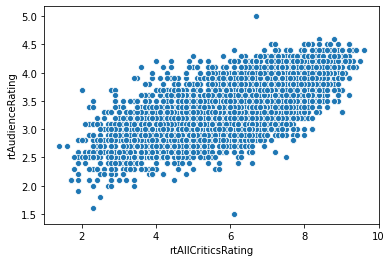

In [5]:
sns.scatterplot('rtAllCriticsRating', 'rtAudienceRating', data=movies)
plt.show()

The `relplot` does the same thing, but is a Seaborn *figure-level* plot (meaning it controls the entire matplotlib drawing process, including figure size):

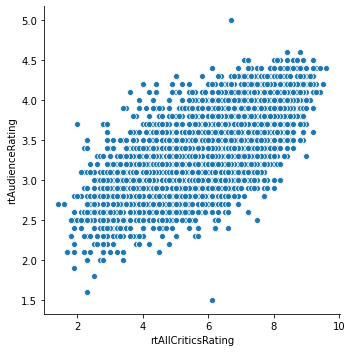

In [6]:
sns.relplot('rtAllCriticsRating', 'rtAudienceRating', data=movies)
plt.show()

### Joint Plot

If we also want to show the marginal distributions (the distributions of individual variables), we can use a `jointplot`:

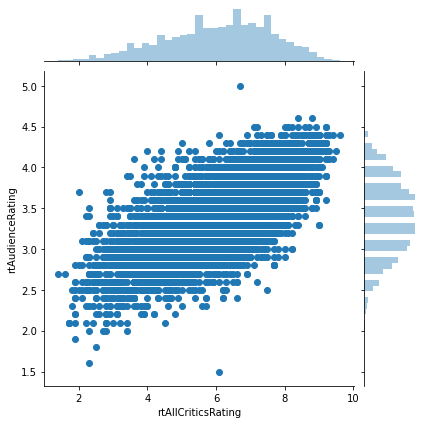

In [7]:
sns.jointplot('rtAllCriticsRating', 'rtAudienceRating', data=movies)
plt.show()

These plots are exceptionally useful in exporatory analysis.

### Trend Line

And we can draw a scatterplot with a trend line using `regplot` (here I am specifying additional line options, `line_kws`, to make the line visibile as a different color):

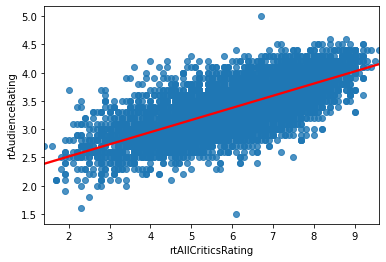

In [8]:
sns.regplot('rtAllCriticsRating', 'rtAudienceRating', data=movies, line_kws={'color': 'red'})

### Scatterplot Matrix

If we want to view relationships between more than 2 variables, we can look at the individual pairwise potential relationships through a *scatterplot matrix* (Seaborn pairplot):

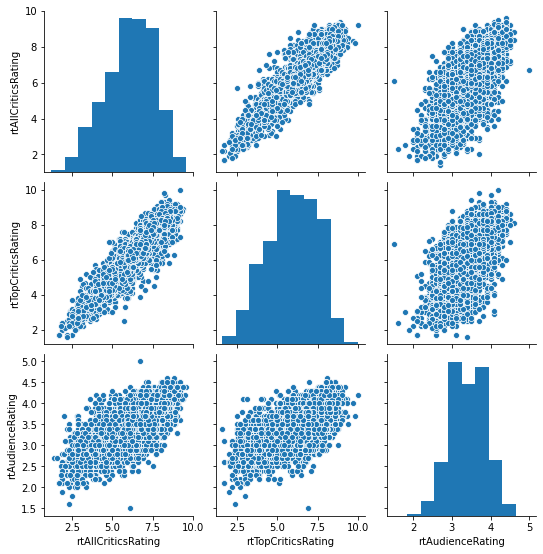

In [9]:
sns.pairplot(movies[['rtAllCriticsRating', 'rtTopCriticsRating', 'rtAudienceRating']])

## Correlation and Covariance

The Pandas `cov` method computes covariance between two series:

In [10]:
movies['rtAllCriticsRating'].cov(movies['rtTopCriticsRating'])

2.1505561772886375

Covariance is symmetric:

In [11]:
movies['rtTopCriticsRating'].cov(movies['rtAllCriticsRating'])

2.1505561772886375

By default, it also ignores observations with missing values.

The `cor` method computes the *correlation coefficient* $-1 \le r \le 1$, that is independent of the variance or scale of the data (1 always means perfect correlation):

In [12]:
movies['rtAllCriticsRating'].corr(movies['rtTopCriticsRating'])

0.934600465561324

That is a high correlation for almost any purpose.

We can also compute a *correlation matrix* by calling `.corr` on a data frame:

In [13]:
movies[['rtAllCriticsRating', 'rtTopCriticsRating', 'rtAudienceRating']].corr()

,rtAllCriticsRating,rtTopCriticsRating,rtAudienceRating
rtAllCriticsRating,1.000000,0.934600,0.718364
rtTopCriticsRating,0.934600,1.000000,0.627785
rtAudienceRating,0.718364,0.627785,1.000000


This shows the correlation between each pair of variables.  The correlation of a variable with itself is always 1 (and the *covariance* of a variable with itself is its variance — do the algebra to convince yourself why!).  Audience and top critics are not as well-correlated as the two critic sources, or audience with all critics.

## Bootstrapping the Correlation

We can use the bootstrap to compute a confidence interval for the correlation between two variables.  Let's do that for audience and top-critics ratings.

We'll start by making a frame that just has those columns, with NAs removed:

In [14]:
crit_movies = movies.set_index('id')[['rtTopCriticsRating', 'rtAudienceRating']].dropna()

And compute the correlation, for reference:

In [15]:
crit_movies['rtTopCriticsRating'].corr(crit_movies['rtAudienceRating'])

0.6277851818091278

Now let's bootstrap that.  We'll bootstrap 10000 times.  This time we will use a `for` loop, just to demonstrate that.  We're also going to use the Pandas [`sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method, to sample *rows of a data frame* (and thus pairs of observations).  To bootstrap a correlation, we can't just sample individual values!

In [16]:
NBOOT = 10000
boot_corrs = np.empty(NBOOT)
for i in range(NBOOT):
    samp = crit_movies.sample(n=len(crit_movies), replace=True)
    boot_corrs[i] = samp['rtTopCriticsRating'].corr(samp['rtAudienceRating'])
np.quantile(boot_corrs, [0.025, 0.975])

array([0.60939528, 0.64571617])

We can also see the approximated sampling distribution:

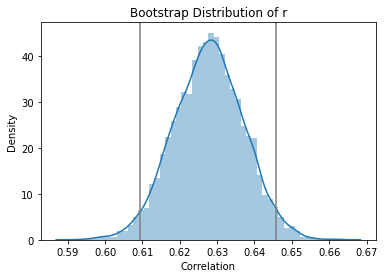

In [17]:
sns.distplot(boot_corrs)
lb, ub = np.quantile(boot_corrs, [0.025, 0.975])
plt.axvline(lb, color='grey')
plt.axvline(ub, color='grey')
plt.title('Bootstrap Distribution of r')
plt.ylabel('Density')
plt.xlabel('Correlation')
plt.show()

## Regression

Finally, I want to show you how to fit the regression model:

In [18]:
mod = smf.ols('rtAudienceRating ~ rtTopCriticsRating', data=movies)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rtAudienceRating   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     3012.
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:28:47   Log-Likelihood:                -1701.8
No. Observations:                4632   AIC:                             3408.
Df Residuals:                    4630   BIC:                             3421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.2847      0.021    111.441      0.000       2.245       2.325
rtTopCriticsRating     0.1838      0.003     54.879      0.000       0.177       0.190
==============================================================================
Omnibus:                        3.451   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.414
Skew:                          -0.053   Prob(JB):                        0.181
Kurtosis:                       3.079   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For now, we need to **ignore** the *p*-value.

This learns the following line, where $y$ is the audience rating and $x$ the critic rating:

$$\hat{y} = 2.2847 + 0.1838 \times x$$

Later we're going to see why, but we want check the residuals for normality:

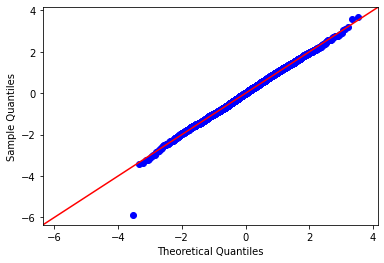

In [19]:
sm.qqplot(res.resid, fit=True, line='45')
plt.show()

Looks good! One outlier.

Let's also look at the residuals vs. fitted plot, to test for equal variance:

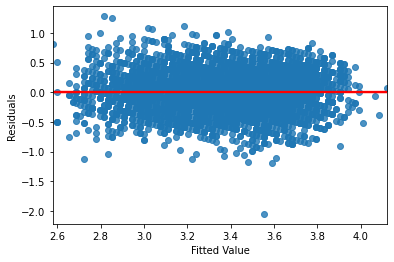

In [20]:
sns.regplot(res.fittedvalues, res.resid, line_kws={'color': 'red'})
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')
plt.show()

I'm also going to plot the regression line ourselves:

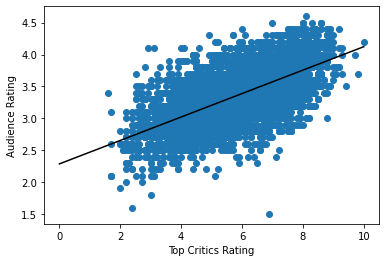

In [21]:
plt.scatter(movies['rtTopCriticsRating'], movies['rtAudienceRating'])
l_xs = np.linspace(0, 10, 100)
l_ys = res.params[0] + res.params[1] * l_xs
plt.plot(l_xs, l_ys, color='black')
plt.xlabel('Top Critics Rating')
plt.ylabel('Audience Rating')
plt.show()

## Predictive Accuracy

Now, we should have done this **before** we started fitting any models.  We will adopt proper splitting in the future.

We're going to make *train* and *test* sets:

In [22]:
predictable = movies.dropna(subset=['rtTopCriticsRating', 'rtAudienceRating'])
predictable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4632 entries, 0 to 10195
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4632 non-null   int64  
 1   title                   4632 non-null   object 
 2   imdbID                  4632 non-null   int64  
 3   spanishTitle            4632 non-null   object 
 4   imdbPictureURL          4603 non-null   object 
 5   year                    4632 non-null   int64  
 6   rtID                    4603 non-null   object 
 7   rtAllCriticsRating      4632 non-null   float64
 8   rtAllCriticsNumReviews  4632 non-null   float64
 9   rtAllCriticsNumFresh    4632 non-null   float64
 10  rtAllCriticsNumRotten   4632 non-null   float64
 11  rtAllCriticsScore       4632 non-null   float64
 12  rtTopCriticsRating      4632 non-null   float64
 13  rtTopCriticsNumReviews  4632 non-null   float64
 14  rtTopCriticsNumFresh    4632 non-null  

Sample 20% of movies as test data:

In [23]:
test = predictable.sample(frac=0.2)

Create a *mask* and use it to pick the rest as training data:

In [24]:
train_mask = pd.Series(True, index=predictable.index)
train_mask[test.index] = False
train = predictable[train_mask]

Fit the model:

In [25]:
pmod = smf.ols('rtAudienceRating ~ rtTopCriticsRating', data=train)
pfit = pmod.fit()
pfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rtAudienceRating   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     2359.
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:28:48   Log-Likelihood:                -1400.3
No. Observations:                3706   AIC:                             2805.
Df Residuals:                    3704   BIC:                             2817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.2852      0.023     98.873      0.000       2.240       2.331
rtTopCriticsRating     0.1832      0.004     48.567      0.000       0.176       0.191
==============================================================================
Omnibus:                        2.666   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                2.606
Skew:                          -0.062   Prob(JB):                        0.272
Kurtosis:                       3.042   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
preds = pfit.predict(test)
test['predAud'] = preds
test

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,predAud
9775,58029,It's a Free World...,807054,En un mundo libre...,http://ia.media-imdb.com/images/M/MV5BMjEzMjY3...,2007,its_a_free_world,6.6,18.0,15.0,...,6.2,6.0,4.0,2.0,66.0,3.6,1788.0,70.0,http://content7.flixster.com/movie/10/49/04/10...,3.421068
8367,27741,Tasogare Seibei,351817,El ocaso del samurái,http://ia.media-imdb.com/images/M/MV5BMTgzMTA1...,2002,twilight_samurai,8.2,68.0,67.0,...,7.9,22.0,22.0,0.0,100.0,4.2,3512.0,93.0,http://content9.flixster.com/movie/10/92/29/10...,3.732509
9343,49644,Off the Black,479965,Off the Black,http://ia.media-imdb.com/images/M/MV5BMTc1NzIw...,2006,off_the_black,6.2,40.0,27.0,...,6.4,17.0,13.0,4.0,76.0,3.3,1007.0,57.0,http://content8.flixster.com/movie/36/98/94/36...,3.457708
8915,39390,The Gospel,451069,The Gospel,http://ia.media-imdb.com/images/M/MV5BMTQ1Njkw...,2005,gospel,4.9,37.0,12.0,...,5.1,13.0,5.0,8.0,38.0,3.5,1967.0,78.0,http://content8.flixster.com/movie/25/02/25029...,3.219547
6799,7192,Only the Strong,107750,Sólo el más fuerte,http://ia.media-imdb.com/images/M/MV5BMTY3MDQx...,1993,only_the_strong,2.8,7.0,0.0,...,2.5,5.0,0.0,5.0,0.0,3.7,1259.0,79.0,http://content9.flixster.com/movie/10/86/99/10...,2.743225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050,62293,The Duchess,864761,La duquesa,http://ia.media-imdb.com/images/M/MV5BMTU1MTQz...,2008,10009493-duchess,6.3,161.0,98.0,...,6.6,35.0,24.0,11.0,68.0,3.5,22537.0,69.0,http://content8.flixster.com/movie/10/85/97/10...,3.494348
4975,5296,The Sweetest Thing,253867,La cosa más dulce,http://ia.media-imdb.com/images/M/MV5BMTMzNDA1...,2002,sweetest_thing,4.2,104.0,26.0,...,4.2,26.0,7.0,19.0,26.0,3.0,21858.0,68.0,http://content9.flixster.com/movie/58/56/24/58...,3.054667
4001,4300,Bread and Roses,212826,Pan y rosas,http://ia.media-imdb.com/images/M/MV5BMjM5MzQ2...,2000,bread_and_roses,6.1,62.0,40.0,...,6.3,21.0,15.0,6.0,71.0,3.7,1038.0,76.0,http://content9.flixster.com/movie/74/96/53/74...,3.439388
9043,43560,Nanny McPhee,396752,La niñera mágica,http://ia.media-imdb.com/images/M/MV5BMTIzOTU4...,2005,1153987-nanny_mcphee,6.6,130.0,95.0,...,6.4,29.0,19.0,10.0,65.0,3.2,48480.0,63.0,http://content7.flixster.com/movie/10/92/77/10...,3.457708


And now we're going to compute the **root mean squared error** (RMSE):

$$\mathrm{RMSE} = \sqrt{\frac{1}{n}\sum_i (y - \hat{y})^2}$$

In [27]:
test['error'] = test['rtAudienceRating'] - test['predAud']
np.sqrt(np.mean(np.square(test['error'])))

0.3343906896473175

And the **mean absolute error** (MAE):

$$\mathrm{MAE} = \frac{1}{n}\sum_i |y - \hat{y}|$$

In [28]:
np.mean(np.abs(test['error']))

0.2635027350646757